In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, tanh


# Quiver 2V analysis

Speed statistics:
Min speed: 0.4984
Max speed: 40.7814
Mean speed: 19.6661
Areas with speed < 9.8331 represent slow dynamics


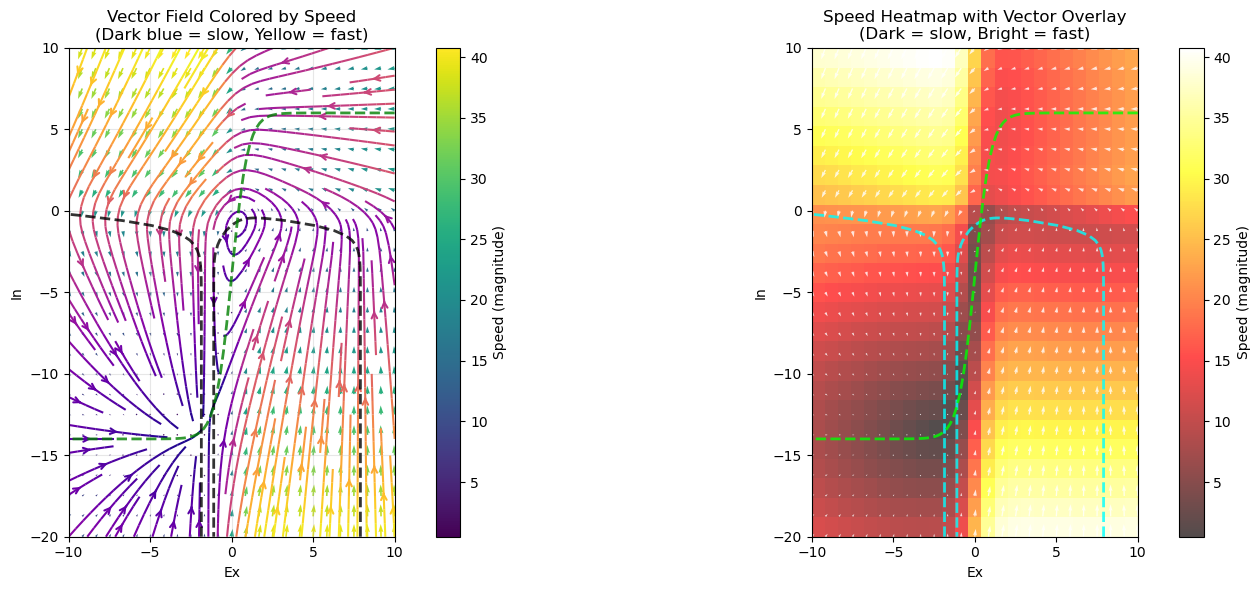

In [9]:
def dX_dt(X):
    """ Return the rates at all positions. """
    h_ex, h_in, tau_ex, tau_in, c2, c4, c_EE, c_EI = (-7.1, -4., 1, 1.5, 10, 0, 5, 10)  # SNIC
    
    return array([ (h_ex - X[0] - c2*tanh(X[1]) + c_EE*tanh(X[0]))*tau_ex,
                   (h_in - X[1] - c4*tanh(X[1]) + c_EI*tanh(X[0]))*tau_in
                 ])

# Create grid
x = np.linspace(-10, 10, 25)
y = np.linspace(-20, 10, 25)
X, Y = np.meshgrid(x, y)

# Calculate vector field and magnitudes
DX = np.zeros_like(X)
DY = np.zeros_like(Y)
magnitudes = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX = dX_dt([X[i,j], Y[i,j]])
        DX[i,j] = dX[0]
        DY[i,j] = dX[1]
        magnitudes[i,j] = np.sqrt(dX[0]**2 + dX[1]**2)  # Calculate magnitude

# Create plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Colored arrows by magnitude
q1 = ax1.quiver(X, Y, DX, DY, magnitudes, 
               cmap='viridis', 
               angles='xy', 
               scale_units='xy', 
               scale=50,
               width=0.005)

# Add colorbar for magnitudes
cbar1 = plt.colorbar(q1, ax=ax1)
cbar1.set_label('Speed (magnitude)')

# Plot streamlines with color mapping to magnitude
strm = ax1.streamplot(X, Y, DX, DY, color=magnitudes, cmap='plasma', 
                     linewidth=1.5, density=1.2, arrowstyle='->')

# Add nullclines
x_nc = np.linspace(-10, 10, 100)
y_nc = np.linspace(-20, 10, 100)
X_nc, Y_nc = np.meshgrid(x_nc, y_nc)

dX_null = np.zeros_like(X_nc)
dY_null = np.zeros_like(Y_nc)
for i in range(X_nc.shape[0]):
    for j in range(X_nc.shape[1]):
        dX_val = dX_dt([X_nc[i,j], Y_nc[i,j]])
        dX_null[i,j] = dX_val[0]
        dY_null[i,j] = dX_val[1]

ax1.contour(X_nc, Y_nc, dX_null, levels=[0], colors='black', linewidths=2, linestyles='--', alpha=0.8)
ax1.contour(X_nc, Y_nc, dY_null, levels=[0], colors='green', linewidths=2, linestyles='--', alpha=0.8)

ax1.set_xlabel('Ex')
ax1.set_ylabel('In')
ax1.set_title('Vector Field Colored by Speed\n(Dark blue = slow, Yellow = fast)')
ax1.set_xlim([-10, 10])
ax1.set_ylim([-20, 10])
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Plot 2: Just the magnitude as a heatmap with arrows
im = ax2.imshow(magnitudes, extent=[-10, 10, -20, 10], 
               origin='lower', cmap='hot', alpha=0.7)
q2 = ax2.quiver(X, Y, DX, DY, color='white', 
               angles='xy', scale_units='xy', scale=50,
               width=0.004, alpha=0.8)

# Add colorbar for heatmap
cbar2 = plt.colorbar(im, ax=ax2)
cbar2.set_label('Speed (magnitude)')

# Add nullclines to second plot
ax2.contour(X_nc, Y_nc, dX_null, levels=[0], colors='cyan', linewidths=2, linestyles='--', alpha=0.8)
ax2.contour(X_nc, Y_nc, dY_null, levels=[0], colors='lime', linewidths=2, linestyles='--', alpha=0.8)

ax2.set_xlabel('Ex')
ax2.set_ylabel('In')
ax2.set_title('Speed Heatmap with Vector Overlay\n(Dark = slow, Bright = fast)')
ax2.set_xlim([-10, 10])
ax2.set_ylim([-20, 10])
ax2.set_aspect('equal')

plt.tight_layout()
# plt.show()

# Print some statistics about the speeds
print(f"Speed statistics:")
print(f"Min speed: {magnitudes.min():.4f}")
print(f"Max speed: {magnitudes.max():.4f}")
print(f"Mean speed: {magnitudes.mean():.4f}")
print(f"Areas with speed < {magnitudes.mean()/2:.4f} represent slow dynamics")

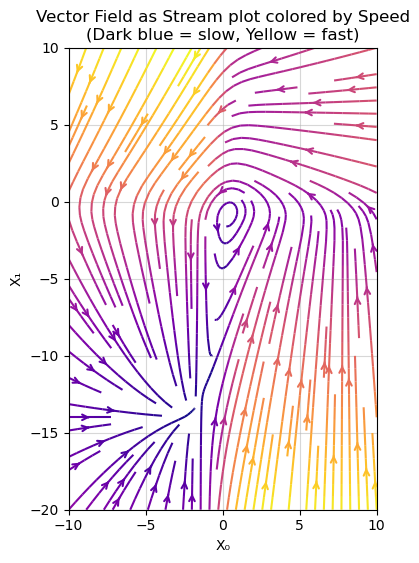

In [11]:
def dX_dt(X):
    """ Return the rates at all positions. """
    h_ex, h_in, tau_ex, tau_in, c2, c4, c_EE, c_EI = (-7.1, -4., 1, 1.5, 10, 0, 5, 10)
    
    return array([ (h_ex - X[0] - c2*tanh(X[1]) + c_EE*tanh(X[0]))*tau_ex,
                   (h_in - X[1] - c4*tanh(X[1]) + c_EI*tanh(X[0]))*tau_in
                 ])

# Grid
x = np.linspace(-10, 10, 25)
y = np.linspace(-20, 10, 25)
X, Y = np.meshgrid(x, y)

# Vector field and magnitudes
DX = np.zeros_like(X)
DY = np.zeros_like(Y)
magnitudes = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dX = dX_dt([X[i,j], Y[i,j]])
        DX[i,j] = dX[0]
        DY[i,j] = dX[1]
        magnitudes[i,j] = np.sqrt(dX[0]**2 + dX[1]**2)

# Plot
fig, ax1 = plt.subplots(figsize=(16, 6))

# Streamlines with color mapping to magnitude
strm = ax1.streamplot(X, Y, DX, DY, color=magnitudes, cmap='plasma', 
                     linewidth=1.5, density=1.2, arrowstyle='->')

ax1.set_xlabel('X₀')
ax1.set_ylabel('X₁')
ax1.set_title('Vector Field as Stream plot colored by Speed\n(Dark blue = slow, Yellow = fast)')
ax1.set_xlim([-10, 10])
ax1.set_ylim([-20, 10])
ax1.grid(True, alpha=0.5)
ax1.set_aspect('equal')


# Current Winds

https://earth.nullschool.net/#current/wind/surface/level/orthographic=4.77,48.88,1230

